# Investigating Fandango Movie Ratings

In 2015, Walt Hickey, a data journalist reported a discrepancy in the "Rating Value" and "Stars Ratings" on Fandango Website. Based on his research, he found that the star ratings, on Fandango website, are essentially inflated (by atlaest half-a-star) compared to rating values of the movies. When contacted, the officials from Fandango pointed to a glicth in their rounding off algorithm for the discrepancy and promised to fix the problem in the near future. 

In this project we would try to find out if they indeed have fixed the issue. We will do so with the help of two datasets - 

(1) fandango_score_comparison.csv: This dataset was used by Mr. Hickey for his research and the subsequent article on fivethirtyeight.com (Link: https://fivethirtyeight.com/features/fandango-movies-ratings/). For this dataset, Mr. Hickeey only incuded those moviees which had a reviews of atleast 30 users. 

(2) movie_ratings_16_17.csv: This dataset contains the ratings of various movies, released in 2016-17, available on different websites (IMDb, Metacritic, Rotten Tomatoes etc.)

In [1]:
# As usual, we will start by importing all the required libraries 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Next we will read both the available .csv files in pandas dataframes: 
rating_comp = pd.read_csv("fandango_score_comparison.csv")
rating_16 = pd.read_csv("movie_ratings_16_17.csv")

In [62]:
# Converting the column names in rating_comp dataframe to snakecase 
columns = list(rating_comp.columns)
for column in columns:
    rating_comp.rename({column:column.lower()}, inplace = True, axis = 1)
rating_comp.head()

film  rottentomatoes  rottentomatoes_user  \
0  Avengers: Age of Ultron (2015)              74                   86   
1               Cinderella (2015)              85                   80   
2                  Ant-Man (2015)              80                   90   
3          Do You Believe? (2015)              18                   84   
4   Hot Tub Time Machine 2 (2015)              14                   28   

   metacritic  metacritic_user  imdb  fandango_stars  fandango_ratingvalue  \
0          66              7.1   7.8             5.0                   4.5   
1          67              7.5   7.1             5.0                   4.5   
2          64              8.1   7.8             5.0                   4.5   
3          22              4.7   5.4             5.0                   4.5   
4          29              3.4   5.1             3.5                   3.0   

   rt_norm  rt_user_norm         ...           imdb_norm  rt_norm_round  \
0     3.70           4.3         ...                3.90            3.5   
1     4.25           4.0         ...                3.55            4.5   
2     4.00           4.5         ...                3.90            4.0   
3     0.90           4.2         ...                2.70            1.0   
4     0.70           1.4         ...                2.55            0.5   

   rt_user_norm_round  metacritic_norm_round  metacritic_user_norm_round  \
0                 4.5                    3.5                         3.5   
1                 4.0                    3.5                         4.0   
2                 4.5                    3.0                         4.0   
3                 4.0                    1.0                         2.5   
4                 1.5                    1.5                         1.5   

   imdb_norm_round  metacritic_user_vote_count  imdb_user_vote_count  \
0              4.0                        1330                271107   
1              3.5                         249                 65709   
2              4.0                         627                103660   
3              2.5                          31                  3136   
4              2.5                          88                 19560   

   fandango_votes  fandango_difference  
0           14846                  0.5  
1           12640                  0.5  
2           12055                  0.5  
3            1793                  0.5  
4            1021                  0.5  

[5 rows x 22 columns]

Text(0.5,1,'ax_1: Normalized Ratings Distribution Across Different Websites')

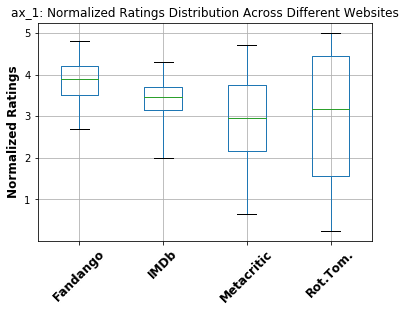

In [74]:
# Let's start by analyzing the normalized movie rating distribution across different websites  
ax_1 = rating_comp.boxplot(["fandango_ratingvalue", "imdb_norm", "metacritic_norm", "rt_norm"], whis = 4)
ax_1.set_xticklabels(["Fandango", "IMDb", "Metacritic", "Rot.Tom."], rotation = 45, fontsize = 12, fontweight = "bold")
ax_1.set_ylabel("Normalized Ratings", fontsize = 12, fontweight = "bold")
ax_1.set_title("ax_1: Normalized Ratings Distribution Across Different Websites")

Text(0.5,1,'ax_2: Normalized Ratings Distribution Across Different Websites')

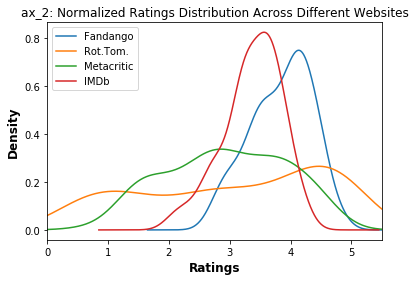

In [75]:
columns = ["fandango_ratingvalue", "rt_norm", "metacritic_norm", "imdb_norm"]
for column in columns:
    ax_2 = rating_comp[column].plot.kde( label = column, legend = True)
    ax_2.set_xlim(0,5.5, 0.5)
    
ax_2.legend(["Fandango", "Rot.Tom.", "Metacritic", "IMDb"])
ax_2.set_xlabel("Ratings", fontsize = 12, fontweight = "bold")
ax_2.set_ylabel("Density", fontsize = 12, fontweight = "bold")
ax_2.set_title("ax_2: Normalized Ratings Distribution Across Different Websites")

From the boxplot of normalized ratings distribution (ax_1), it is clear that movie ratings on Fandango website are higher than the other websites. The respectiive kde plots (ax_2) support this argument as the kde plot of Fandango website are left skewed which is in contrast with other kde plots that follow a gaussian distribution. 

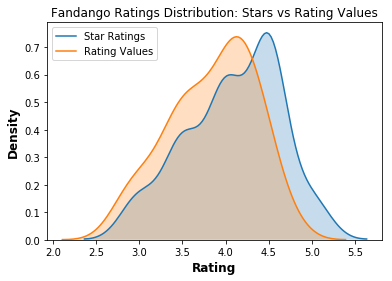

In [76]:
ax_3 = sns.kdeplot(rating_comp["fandango_stars"], shade = True)
ax_3 = sns.kdeplot(rating_comp["fandango_ratingvalue"], shade = True)
ax_3.set_xlabel("Rating", fontsize = 12, fontweight = "bold")
ax_3.set_ylabel("Density", fontsize = 12, fontweight = "bold")
ax_3.set_title("Fandango Ratings Distribution: Stars vs Rating Values", fontsize = 12)
ax_3.legend(["Star Ratings", "Rating Values"])

The figure above (ax_3) highlights the argument made by Mr. Hickey: Star ratings of Fandango website are inflated with respect to the corresponding rating values of the movies. 

In the beginning of this project we mentioned our goal was to determine if star ratings on Fandango website continues to be inflated. We have the data set rating_comp which consists of the movies released in 2015 that had atleast 30 reviews from users. So it didn't contain all the movies relased in 2015. Similarly, the other dataset (rating_16) contains only those movies which had significant number of votes. So, by all accounts, the given datasets cannot be a representaive sample of all movies released in 2015 and 2016 respectively. However, since the no. of votes and user reviews correpond a popular movie, so we can slighly alter our goal to the comparison of fandango movie ratings for the popular movies in 2015 to 2016.     

In [7]:
# With thie note, Now let's shift our focus to the scond dataframe
rating_16.head()

movie  year  metascore  imdb  tmeter  audience  fandango  \
0      10 Cloverfield Lane  2016         76   7.2      90        79       3.5   
1                 13 Hours  2016         48   7.3      50        83       4.5   
2      A Cure for Wellness  2016         47   6.6      40        47       3.0   
3          A Dog's Purpose  2017         43   5.2      33        76       4.5   
4  A Hologram for the King  2016         58   6.1      70        57       3.0   

   n_metascore  n_imdb  n_tmeter  n_audience  nr_metascore  nr_imdb  \
0         3.80    3.60      4.50        3.95           4.0      3.5   
1         2.40    3.65      2.50        4.15           2.5      3.5   
2         2.35    3.30      2.00        2.35           2.5      3.5   
3         2.15    2.60      1.65        3.80           2.0      2.5   
4         2.90    3.05      3.50        2.85           3.0      3.0   

   nr_tmeter  nr_audience  
0        4.5          4.0  
1        2.5          4.0  
2        2.0          2.5  
3        1.5          4.0  
4        3.5          3.0

Text(0.5,1,'ax_4: Kernel Denisty Estimation of Fandango movie Ratings: 2015 & 2016')

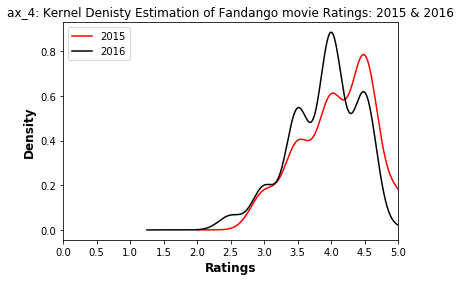

In [85]:
# In the next three graphs (ax_4, ax_5, ax_6) we will be comparing the Fandango movie ratings distribution for popular movies
ax_4 = rating_comp["fandango_stars"].plot.kde(label = "2015", legend = True, color = "red")
ax_4 = rating_16["fandango"].plot.kde(label = "2016", legend = True, color = "black")
ax_4.set_xlim(0.0,5.0, 0.5)
ax_4.set_xlabel("Ratings", fontweight = "bold", fontsize = 12)
ax_4.set_ylabel("Density", fontweight = "bold", fontsize = 12)
ax_4.set_xticks([i for i in np.arange(0,5.5, 0.5)])
ax_4.set_title("ax_4: Kernel Denisty Estimation of Fandango movie Ratings- 2015 & 2016")

Text(0.5,1,'ax_5: Comparison of Fandango Ratings Distribution- 2015 & 2016 (Box Plot)')

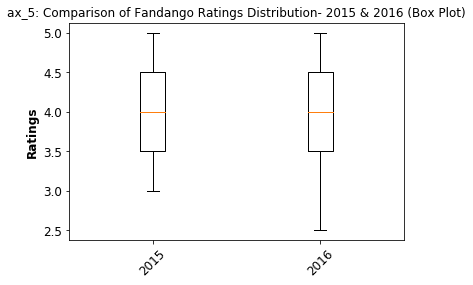

In [86]:
ax_5 = plt.subplot()
ax_5.boxplot([rating_comp["fandango_stars"], rating_16["fandango"]])
ax_5.set_xticklabels(["2015", "2016"], fontsize = 12, rotation = 45)
ax_5.set_yticklabels([i for i in np.arange(2.0,5.5,.5)], fontsize = 12)
ax_5.set_ylabel("Ratings", fontweight = "bold", fontsize = 12)
ax_5.set_title("ax_5: Comparison of Fandango Ratings Distribution- 2015 & 2016 (Box Plot)")

Text(0.5,1,'Fandango Ratings Comparison: Mean, Mode & Median')

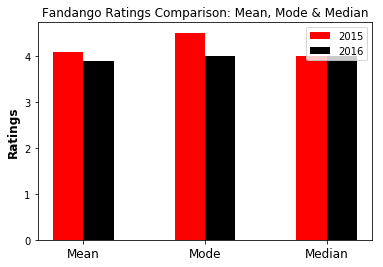

In [88]:
mean_15 = rating_comp["fandango_stars"].mean()
mode_15 = rating_comp["fandango_stars"].mode()
median_15 = rating_comp["fandango_stars"].median()
mean_16 = rating_16["fandango"].mean()
mode_16 = rating_16["fandango"].mode()
median_16 = rating_16["fandango"].median()
ax_6 = plt.subplot()
ax_6.bar([1,3,5], [mean_15,mode_15, median_15], width=0.5, color = "red")
ax_6.bar([1.5,3.5,5.5], [mean_16,mode_16, median_16], width=0.5, color = "black")
ax_6.set_xticks([1.25,3.25,5.25])
ax_6.set_xticklabels(["Mean", "Mode", "Median"], rotation= 0, fontsize = 12)
ax_6.set_ylabel("Ratings", fontsize = 12, fontweight = "bold")
ax_6.legend(["2015", "2016"], loc = "upper right")
ax_6.set_title("Fandango Ratings Comparison: Mean, Mode & Median")

Following points can be interpreted from the graphs above (ax_4, ax_5, ax_6):
* The movie ratings distribution by Fandango, in 2015, is more left skewed in comparison with 2016 (which slighlty resembles to a gaussian distribution). This implies that, in 2016, the average movies ratings has been lower. This is also evident from the mean values of the ratings(graph ax_6)
* The kde plot in ax_4 shows that more movies received stars betweeen 3.0 and 4.0 in 2016 and unlike 2015, when the most common star rating was 4.5 (mode value in ax_6), the most common rating was 4.0. 
* From the box plot in ax_5 it is clear that the movie ratings in 2016 were widely distributed as compare to 2015
* In conclusion there is indeed a change in the ratings of popular movies on Fandango website. Now, whether this change was a result of Mr. Hickey's article or for some reason there was a dip in the qualiity of the movies in 2016 as compare to 2015. For us, the former seems more reasonable explanation.  

### Learning Summary 

* Concepts Explored: seaborn, data sampling, frequency distribution, mean, mode, median, kernel density estimation
* Functions and Methods Used: sns.kdeplot(), axes.boxplot(), axes.bar(), df.plot.kde() 